In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd




# Import dataset

https://archive.ics.uci.edu/dataset/143/statlog+australian+credit+approval

In [3]:
data_loc = '../../data/credit_card_applications/Credit_Card_Applications.csv'

dataset = pd.read_csv(data_loc)
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
X = dataset.drop(['Class'], axis=1).values
y  = dataset['Class'].values

In [9]:
X

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
        1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
        2.8000000e+02, 1.0000000e+00],
       ...,
       [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.0000000e+00],
       [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
        1.2000000e+02, 1.2000000e+01],
       [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
        5.6000000e+02, 1.0000000e+00]])

In [10]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

# Feature scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X)

# Learning

In [15]:
X_scaled.shape[1]

15

In [7]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X_scaled)
som.train_random(data = X_scaled, num_iteration = 100)


# Visualizing Data

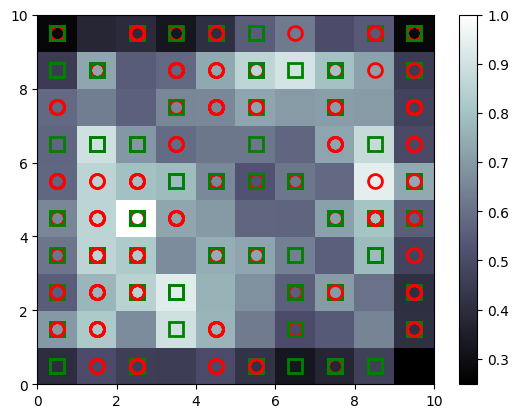

In [11]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()